# Evaluation exercise for Google Summer of Code / ATLAS autoencoders



In [ ]:
cd '/content/drive/MyDrive/atlas-files'

/content/drive/MyDrive/atlas-files


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import corner as corn
from fastai.imports import *
from fastai.data import core
from fastai import learner
import torchviz
import matplotlib as mpl
import matplotlib.pyplot as plt
from colorsys import hsv_to_rgb


In [ ]:
!pip install corner

## Data Loading

The data is loaded with the help of pandas library and then the data is compiled into a 5 coloumn dataframe containing 'obj', 'E', 'pt', 'eta', 'phi'

In [ ]:
cols = ['event ID','process ID','event weight','MET','METphi','obj1, E1, pt1, eta1, phi1','obj2, E2, pt2, eta2, phi2','obj3, E3, pt3, eta3, phi3','obj4, E4, pt4, eta4, phi4','obj5, E5, pt5, eta5, phi5','obj6, E6, pt6, eta6, phi6','obj7, E7, pt7, eta7, phi7','obj8, E8, pt8, eta8, phi8','obj9, E9, pt9, eta9, phi9','obj10, E10, pt10, eta10, phi10','obj11, E11, pt11, eta11, phi11','obj12, E12, pt12, eta12, phi12']

In [ ]:
cols_rem = ['obj1, E1, pt1, eta1, phi1','obj2, E2, pt2, eta2, phi2','obj3, E3, pt3, eta3, phi3','obj4, E4, pt4, eta4, phi4','obj5, E5, pt5, eta5, phi5','obj6, E6, pt6, eta6, phi6','obj7, E7, pt7, eta7, phi7','obj8, E8, pt8, eta8, phi8','obj9, E9, pt9, eta9, phi9','obj10, E10, pt10, eta10, phi10','obj11, E11, pt11, eta11, phi11','obj12, E12, pt12, eta12, phi12']

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/atlas-files/monojet_Zp2000.0_DM_50.0_chan3.csv', sep=';', names = cols)

In [ ]:
start = data[['event ID','process ID','event weight','MET','METphi']]
ss = data[cols_rem[0]].str.split(",",expand = True)
for i in range(1,len(cols_rem)):
  ss_nex = data[cols_rem[i]].str.split(",",expand = True)
  ss = ss.append(ss_nex,ignore_index= True)

ss.dropna(inplace = True)
ss.reset_index(drop=True,inplace =True)
final_dataset = ss[ss[0] == 'j']
rems = final_dataset[0]
final_dataset = final_dataset[[1,2,3,4]].astype(float)
final_dataset = pd.concat([rems,final_dataset],axis = 1)
final_dataset.columns = ['obj', 'E', 'pt', 'eta', 'phi']

In [ ]:
main_data = final_dataset[['pt', 'eta', 'phi', 'E']]

In [ ]:
main_data

,pt,eta,phi,E
1,751597.0,0.858186,-1.842170,1069460.0
2,640429.0,0.330450,0.704554,676000.0
3,616229.0,0.973383,-1.565920,936707.0
4,589524.0,0.390749,1.237340,640313.0
5,545730.0,0.364057,-1.607320,583373.0
...,...,...,...,...
23468,31726.6,1.209330,-1.832740,58571.5
23469,36075.6,-1.901150,1.240720,124037.0
23470,24791.0,3.085510,0.893034,271819.0
23471,29610.3,2.532910,-2.436230,187700.0


## Normalization
We use log normalisation for scaling the data inorder to reduce the effects of extreme events on the final outcome

In [ ]:

def log_normalize(train, test=None):
    train['pt'] = train['pt'].apply(lambda x :np.log10(x) / 3.)
    train['E'] = train['E'].apply(lambda x : np.log10(x) / 3.)
    train['eta'] = train['eta'] / 3.
    train['phi'] = train['phi'] / 3.
    if test is not None:
        test['pt'] = test['pt'].apply(lambda x :np.log10(x) / 3.)
        test['E'] = test['E'].apply(lambda x : np.log10(x) / 3.)
        test['eta'] = test['eta'] / 3.
        test['phi'] = test['phi'] / 3.
    
        return train.astype('float32'), test.astype('float32')
    else:
        return train.astype('float32')

## Data Augmentation
The data is split into train and test with test size being 20% of the total size of the data

In [ ]:
train, test = train_test_split(main_data, test_size = 0.2, random_state = 42)

In [ ]:
unnormed_train,unnormed_test = train_test_split(main_data, test_size = 0.2, random_state = 42)

In [ ]:
train, test = log_normalize(train, test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

## Effect of Normalisation on the data

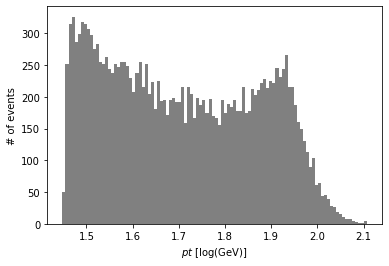

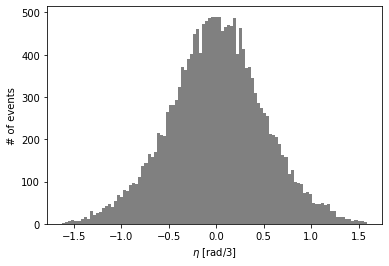

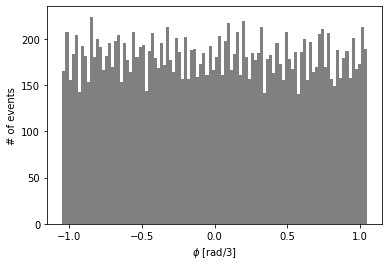

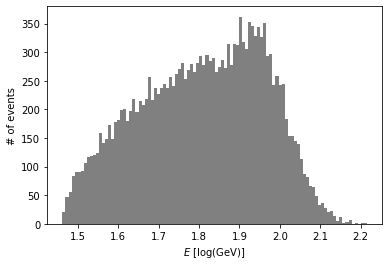

In [ ]:
#norm
import matplotlib.pyplot as plt

unit_list = ['[log(GeV)]', '[rad/3]', '[rad/3]', '[log(GeV)]']
variable_list = [r'$pt$', r'$\eta$', r'$\phi$', r'$E$']


branches=["pt","eta","phi","E"]

n_bins = 100

for kk in range(4):
    n_hist_data, bin_edges, _ = plt.hist(train[branches[kk]], color='gray', label='Input', alpha=1, bins=n_bins)
    plt.xlabel(xlabel=variable_list[kk] + ' ' + unit_list[kk])
    plt.ylabel('# of events')
    #plt.savefig("fourmomentum_"+branches[kk],dpi=300)
    plt.show()

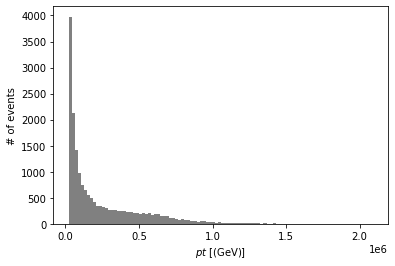

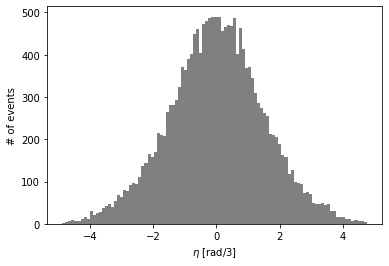

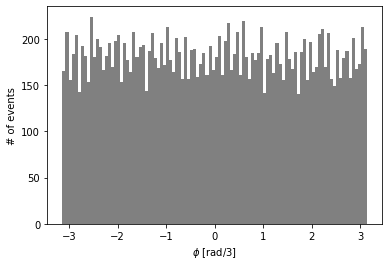

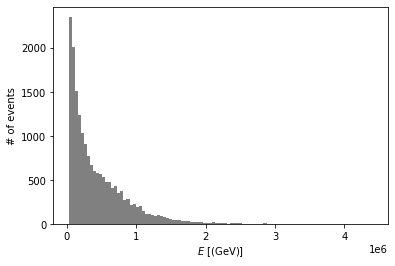

In [ ]:
#non -norm
import matplotlib.pyplot as plt

unit_list = ['[(GeV)]', '[rad/3]', '[rad/3]', '[(GeV)]']
variable_list = [r'$pt$', r'$\eta$', r'$\phi$', r'$E$']


branches=["pt","eta","phi","E"]

n_bins = 100

for kk in range(4):
    n_hist_data, bin_edges, _ = plt.hist(unnormed_train[branches[kk]], color='gray', label='Input', alpha=1, bins=n_bins)
    plt.xlabel(xlabel=variable_list[kk] + ' ' + unit_list[kk])
    plt.ylabel('# of events')
    #plt.savefig("fourmomentum_"+branches[kk],dpi=300)
    plt.show()

In [ ]:

def get_log_normalized_dls(train, test, bs=1024):
    train, test = log_normalize(train, test)
    
    train_x = train
    test_x = test
    train_y = train_x  # y = x since we are building and AE
    test_y = test_x

    train_ds = TensorDataset(torch.tensor(train_x.values, dtype=torch.float), torch.tensor(train_y.values, dtype=torch.float))
    valid_ds = TensorDataset(torch.tensor(test_x.values, dtype=torch.float), torch.tensor(test_y.values, dtype=torch.float))
    
    train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
    
    return train_dl, valid_dl

##Usage of TensorDataset for effective memory management

In [ ]:
train_x = train
test_x = test
train_y = train_x  # y = x since we are building and AE
test_y = test_x

train_ds = TensorDataset(torch.tensor(train_x.values, dtype=torch.float), torch.tensor(train_y.values, dtype=torch.float))
valid_ds = TensorDataset(torch.tensor(test_x.values, dtype=torch.float), torch.tensor(test_y.values, dtype=torch.float))

##Data Optimization
We use Tensor sequential Data loader with a batch size of 256

In [ ]:
bs = 256

# Converts the TensorDataset into a DataLoader object and combines into one DataLoaders object (a basic wrapper
# around several DataLoader objects). 
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=bs * 2)
dls = core.DataLoaders(train_dl, valid_dl)

In [ ]:
class AE_3D_200_LeakyReLU(nn.Module):
    def __init__(self, n_features=4):
        super(AE_3D_200_LeakyReLU, self).__init__()
        self.en1 = nn.Linear(n_features, 200)
        self.en2 = nn.Linear(200, 200)
        self.en3 = nn.Linear(200, 20)
        self.en4 = nn.Linear(20, 3)
        self.de1 = nn.Linear(3, 20)
        self.de2 = nn.Linear(20, 200)
        self.de3 = nn.Linear(200, 200)
        self.de4 = nn.Linear(200, n_features)
        self.tanh = nn.Tanh()

    def encode(self, x):
        return self.en4(self.tanh(self.en3(self.tanh(self.en2(self.tanh(self.en1(x)))))))

    def decode(self, x):
        return self.de4(self.tanh(self.de3(self.tanh(self.de2(self.tanh(self.de1(self.tanh(x))))))))

    def forward(self, x):
        z = self.encode(x)
        return self.decode(z)

    def describe(self):
        return 'in-200-200-20-3-20-200-200-out'

#model = AE_3D_200_LeakyReLU().double()
model = AE_3D_200_LeakyReLU()
model.to('cpu')

AE_3D_200_LeakyReLU(
  (en1): Linear(in_features=4, out_features=200, bias=True)
  (en2): Linear(in_features=200, out_features=200, bias=True)
  (en3): Linear(in_features=200, out_features=20, bias=True)
  (en4): Linear(in_features=20, out_features=3, bias=True)
  (de1): Linear(in_features=3, out_features=20, bias=True)
  (de2): Linear(in_features=20, out_features=200, bias=True)
  (de3): Linear(in_features=200, out_features=200, bias=True)
  (de4): Linear(in_features=200, out_features=4, bias=True)
  (tanh): Tanh()
)

## Model Training

In [ ]:
from fastai.metrics import mse

loss_func = nn.MSELoss()

#bn_wd = False  # Don't use weight decay for batchnorm layers
#true_wd = True  # weight decay will be used for all optimizers
wd = 1e-6

recorder = learner.Recorder()
learn = learner.Learner(dls, model=model, wd=wd, loss_func=loss_func, cbs=recorder)
#was: learn = basic_train.Learner(data=db, model=model, loss_func=loss_func, wd=wd, callback_fns=ActivationStats, bn_wd=bn_wd, true_wd=true_wd)

Learning rate with the minimum loss: 0.0033113110810518267
Learning rate with the steepest gradient: 0.0010000000474974513


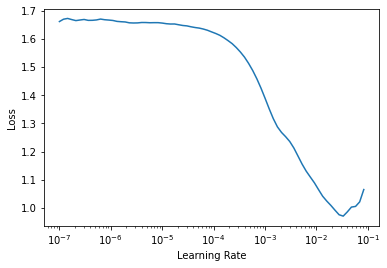

In [ ]:
from fastai.callback import schedule

lr_min, lr_steep = learn.lr_find()

print('Learning rate with the minimum loss:', lr_min)
print('Learning rate with the steepest gradient:', lr_steep)

In [ ]:
def logunnormalized_reconstructions(model, unnormed_df, idxs=None):
    normed_df = log_normalize(unnormed_df.copy())
    
    if idxs is not None:
        data = torch.tensor(normed_df[idxs[0]:idxs[1]].values)
        unnormed_df = torch.tensor(unnormed_df[idxs[0]:idxs[1]].values)
    else:
        data = torch.tensor(normed_df.values)
        unnormed_df = torch.tensor(unnormed_df.values)
        
    pred = model(data)#.detach().numpy()
    pred = pred * 3
    pred[:, 0] = 10**(pred[:, 0])
    pred[:, 3] = 10**(pred[:, 3])
    
    return pred

In [ ]:
import time

start = time.perf_counter() # Starts timer
learn.fit_one_cycle(n_epoch=100)
end = time.perf_counter() # Ends timer
delta_t = end - start
print('Training took', delta_t, 'seconds')

[0, 1.0695003271102905, 0.7115207314491272, '00:00']
[0, 1.0695003271102905, 0.7115207314491272, '00:00']
[1, 0.452019065618515, 0.17028668522834778, '00:00']
[1, 0.452019065618515, 0.17028668522834778, '00:00']
[2, 0.23231583833694458, 0.166524738073349, '00:00']
[2, 0.23231583833694458, 0.166524738073349, '00:00']
[3, 0.18168552219867706, 0.16562238335609436, '00:00']
[3, 0.18168552219867706, 0.16562238335609436, '00:00']
[4, 0.165044903755188, 0.14882180094718933, '00:00']
[4, 0.165044903755188, 0.14882180094718933, '00:00']
[5, 0.09158381074666977, 0.023882735520601273, '00:00']
[5, 0.09158381074666977, 0.023882735520601273, '00:00']
[6, 0.033780716359615326, 0.013836530037224293, '00:00']
[6, 0.033780716359615326, 0.013836530037224293, '00:00']
[7, 0.01741936057806015, 0.011059439741075039, '00:00']
[7, 0.01741936057806015, 0.011059439741075039, '00:00']
[8, 0.008125617168843746, 0.0025923405773937702, '00:00']
[8, 0.008125617168843746, 0.0025923405773937702, '00:00']
[9, 0.003372

##Effects of Normalization on Output data

In [ ]:
#Normalized
print('Comparing input and output:')
for ii in np.arange(100, 105):
    data = valid_ds.tensors[0][ii]
    pred = model(data)
    print('Inp:', data)
    print('Out:', pred)
    print(' ')

Comparing input and output:
Inp: tensor([ 1.7729, -0.1544,  0.4838,  1.7887])
Out: tensor([ 1.7720, -0.1548,  0.4841,  1.7888], grad_fn=<AddBackward0>)
 
Inp: tensor([ 1.4559,  1.2743, -0.3150,  1.9091])
Out: tensor([ 1.4580,  1.2835, -0.3168,  1.9068], grad_fn=<AddBackward0>)
 
Inp: tensor([1.8269, 0.7112, 0.8667, 2.0375])
Out: tensor([1.8262, 0.7111, 0.8672, 2.0396], grad_fn=<AddBackward0>)
 
Inp: tensor([ 1.9027, -0.0726,  0.4763,  1.9082])
Out: tensor([ 1.9024, -0.0737,  0.4770,  1.9086], grad_fn=<AddBackward0>)
 
Inp: tensor([ 1.6529, -0.1524, -0.5856,  1.6739])
Out: tensor([ 1.6540, -0.1510, -0.5854,  1.6705], grad_fn=<AddBackward0>)
 


In [ ]:
#UnNormalized
print('Comparing input and output:')
for ii in np.arange(100, 105):
    data = valid_ds.tensors[0][ii]
    pred = model(data).detach().numpy()
    pred = np.multiply(pred, train_std.values)
    pred = np.add(pred, train_mean.values)
    data = np.multiply(data, train_std.values)
    data = np.add(data, train_mean.values)
    print('Inp:', data)
    print('Out:', pred)
    print(' ')

Comparing input and output:
Inp: tensor([ 7.1459e+05, -2.2607e-01,  8.6510e-01,  1.1954e+06],
       dtype=torch.float64)
Out: [ 7.14352875e+05 -2.26636604e-01  8.65658023e-01  1.19546819e+06]
 
Inp: tensor([ 6.2996e+05,  1.9184e+00, -5.8329e-01,  1.2467e+06],
       dtype=torch.float64)
Out: [ 6.30508138e+05  1.93217239e+00 -5.86423435e-01  1.24571834e+06]
 
Inp: tensor([7.2899e+05, 1.0732e+00, 1.5592e+00, 1.3014e+06], dtype=torch.float64)
Out: [7.28813917e+05 1.07307345e+00 1.56019510e+00 1.30224134e+06]
 
Inp: tensor([ 7.4924e+05, -1.0331e-01,  8.5147e-01,  1.2463e+06],
       dtype=torch.float64)
Out: [ 7.49159517e+05 -1.04898672e-01  8.52784999e-01  1.24646328e+06]
 
Inp: tensor([ 6.8254e+05, -2.2307e-01, -1.0738e+00,  1.1466e+06],
       dtype=torch.float64)
Out: [ 6.82835458e+05 -2.21025743e-01 -1.07349653e+00  1.14512536e+06]
 


##

In [ ]:
train_std = unnormed_train.std()
train_mean = unnormed_train.mean()

## Visualization of the Output Data 

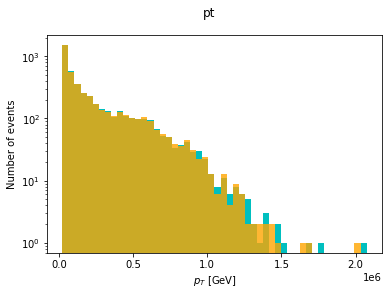

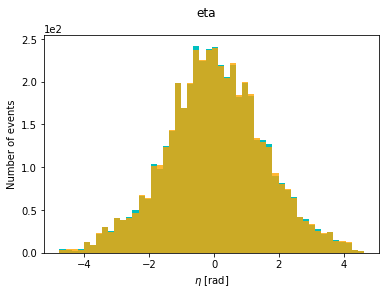

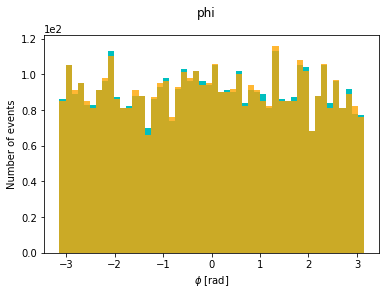

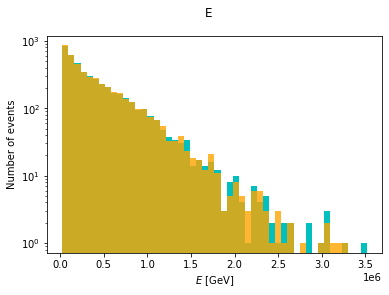

In [ ]:
plt.close('all')
unit_list = ['[GeV]', '[rad]', '[rad]', '[GeV]']
variable_list = [r'$p_T$', r'$\eta$', r'$\phi$', r'$E$']
line_style = ['--', '-']
colors = ['orange', 'c']
markers = ['*', 's']


# Histograms
idxs = (0, int(1e5))  # Choose events to compare
data = torch.tensor(unnormed_test[idxs[0]:idxs[1]].values)
pred = logunnormalized_reconstructions(model, unnormed_test, idxs=idxs)

alph = 0.8
n_bins = 50
for kk in np.arange(4):
    plt.figure(kk + 4)
    n_hist_data, bin_edges, _ = plt.hist(data[:, kk], color=colors[1], label='Input', alpha=1, bins=n_bins)
    n_hist_pred, _, _ = plt.hist(pred[:, kk].detach().numpy(), color=colors[0], label='Output', alpha=alph, bins=bin_edges)
    plt.suptitle(train.columns[kk])
    plt.xlabel(variable_list[kk] + ' ' + unit_list[kk])
    plt.ylabel('Number of events')
    if (kk == 0) or (kk == 3):
        plt.yscale('log')
    else:
        sciy()

In [ ]:


def set_my_style():
    # lines
    mpl.rcParams['lines.linewidth'] = 2
    mpl.rcParams['lines.color'] = 'r'

    # axis
    mpl.rcParams['axes.titlesize'] = 26
    mpl.rcParams['axes.grid'] = True


def sciy():
    plt.gca().ticklabel_format(style='sci', scilimits=(0, 0), axis='y')


def scix():
    plt.gca().ticklabel_format(style='sci', scilimits=(0, 0), axis='x')


def colorprog(i_prog, Nplots, v1=.9, v2=1., cm='hsv'):
    if hasattr(Nplots, '__len__'):
        Nplots = len(Nplots)
    if cm == 'hsv':
        return hsv_to_rgb(float(i_prog) / float(Nplots), v1, v2)
    elif cm == 'rainbow':
        return [plt.cm.rainbow(k) for k in np.linspace(0, 1, Nplots)][i_prog]
    else:
        raise ValueError('Error')

In [ ]:
def rms_f(arr):
    arr = arr.flatten()
    arr[arr == np.nan] = 1
    return np.sqrt(np.sum(arr**2) / len(arr))


## Finding the RMS Value of the Residuals

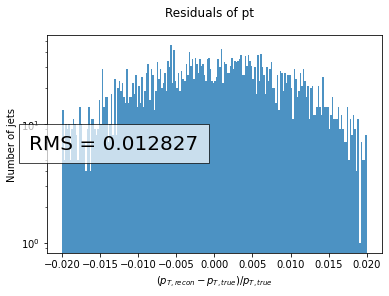

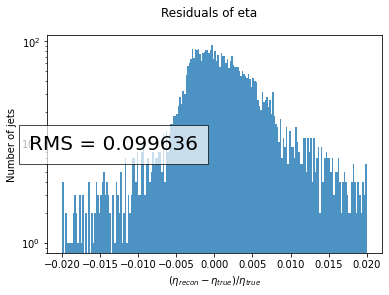

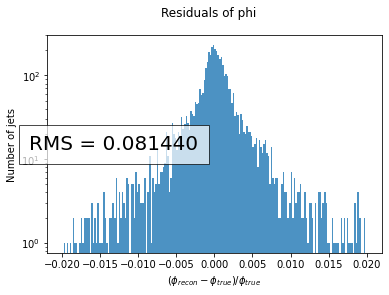

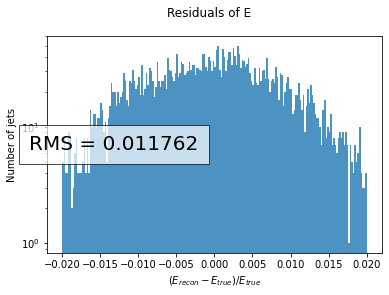

In [ ]:
residual_strings = [r'$(p_{T,recon} - p_{T,true}) / p_{T,true}$',
                    r'$(\eta_{recon} - \eta_{true}) / \eta_{true}$',
                    r'$(\phi_{recon} - \phi_{true}) / \phi_{true}$',
                    r'$(E_{recon} - E_{true}) / E_{true}$']
save = False
residuals = (pred.detach().numpy() - data.detach().numpy()) / data.detach().numpy()
range = (-.02, .02)
#range=None
for kk in np.arange(4):
    plt.figure()
    n_hist_pred, bin_edges, _ = plt.hist(
        residuals[:, kk], label='Residuals', linestyle=line_style[0], alpha=alph, bins=200, range=range)
    plt.suptitle('Residuals of %s' % train.columns[kk])
    plt.xlabel(residual_strings[kk])  # (train.columns[kk], train.columns[kk], train.columns[kk]))
    plt.ylabel('Number of jets')
#    ms.sciy()
    plt.yscale('log')
    rms = rms_f(residuals[:, kk])
    ax = plt.gca()
    plt.text(.2, .5, 'RMS = %f' % (rms), bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 10},
             horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=20)
    if save:
        plt.savefig(figures_path + prefix + '_residuals_' + train.columns[kk])

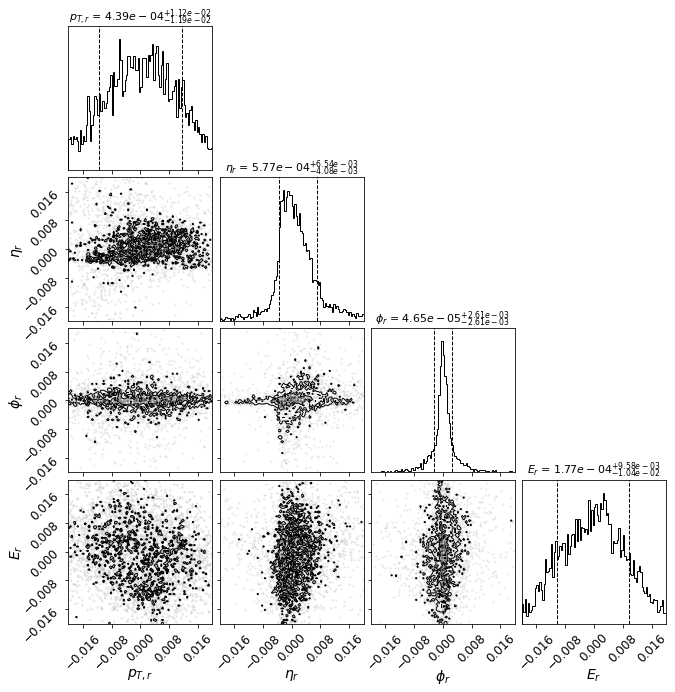

In [ ]:
label_kwargs = {'fontsize': 14}
title_kwargs = {"fontsize": 11}
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
corner_labels = [r'$p_{T,r}$', r'$\eta_{r}$', r'$\phi_{r}$', r'$E_{r}$']
_ = corn.corner(residuals, range=[range for i in np.arange(residuals.shape[1])],
            bins=100, labels=corner_labels, label_kwargs=label_kwargs,
            show_titles=True, title_kwargs=title_kwargs, quantiles=(0.16, 0.84),
            levels=(1 - np.exp(-0.5), .90), fill_contours=False, title_fmt='.2e')

## Event aligned Visualization for better understanding

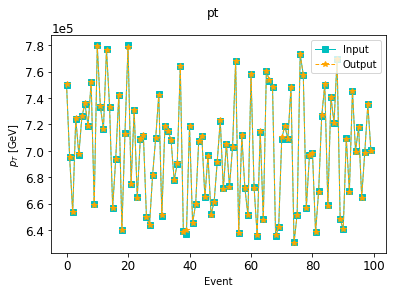

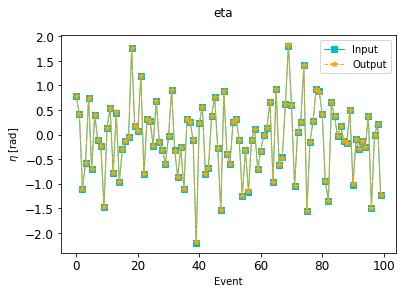

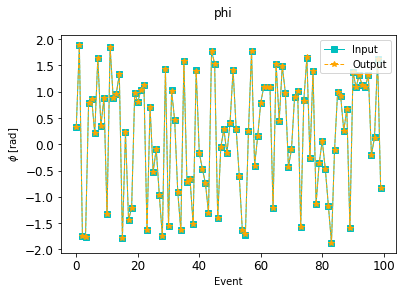

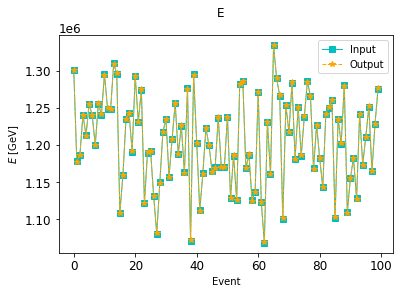

In [ ]:
idxs = (0, 100)  # Choose events to compare
data = torch.tensor(test_x[idxs[0]:idxs[1]].values)
pred = model(data).detach().numpy()
pred = np.multiply(pred, train_std.values)
pred = np.add(pred, train_mean.values)
data = np.multiply(data, train_std.values)
data = np.add(data, train_mean.values)

for kk in np.arange(4):
    plt.figure(kk)
    plt.plot(data[:, kk], color=colors[1], label='Input', linestyle=line_style[1], marker=markers[1])
    plt.plot(pred[:, kk], color=colors[0], label='Output', linestyle=line_style[0], marker=markers[0])
    plt.suptitle(train.columns[kk])
    plt.xlabel('Event')
    plt.ylabel(variable_list[kk] + ' ' + unit_list[kk])
    plt.legend()
    sciy()

In [ ]:
idxs = (0, int(1.9e6))  # Choose events to compare
data = torch.tensor(test_x[idxs[0]:idxs[1]].values)
latent = model.encode(data).detach().numpy()

## Visulization of Latent Space

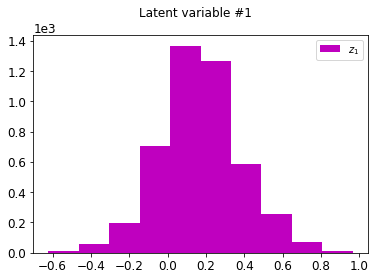

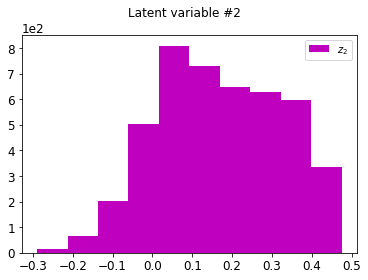

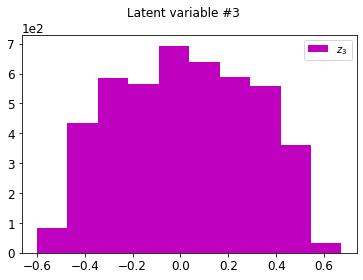

In [ ]:
for ii in np.arange(latent.shape[1]):
    plt.figure()
    plt.hist(latent[:, ii], label='$z_%d$' % (ii + 1), color='m')
    plt.suptitle('Latent variable #%d' % (ii + 1))
    plt.legend()
    sciy()

## Mulit-Dimensional Visualization of the 3D Latent Space

Text(0.5, 0, '$z_3$')

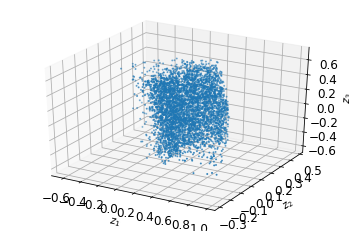

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

idxs = (0, 10000)  # Choose events to compare
data = torch.tensor(test_x[idxs[0]:idxs[1]].values)
latent = model.encode(data).detach().numpy()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(latent[:, 0], latent[:, 1], latent[:, 2], s=1)
ax.set_xlabel(r'$z_1$')
ax.set_ylabel(r'$z_2$')
ax.set_zlabel(r'$z_3$')